In [41]:
import os
os.chdir("/Users/Clair/machine_learning_sp20")

In [42]:
import numpy as np
import pandas as pd
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder


In [43]:
#################################################################
# DATASET #4
# Iris
#################################################################
from sklearn.datasets import load_iris
iris = load_iris()

#mess with the targets so it's in the right shape
targs = iris.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
targets = encoder.fit_transform(targs)

C:\Users\Clair\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [44]:
train_data, test_data, train_targets, test_targets = train_test_split(iris.data, targets, 
                                                                      test_size = 0.3, shuffle = True)



In [50]:
classifier = Sequential()
classifier.add(Dense(8, input_dim=4, activation='relu'))
classifier.add(Dense(8, input_dim=4, activation='relu'))

classifier.add(Dense(8, input_dim=4, activation='relu'))

classifier.add(Dense(3, activation='softmax'))


In [51]:
# Compile model
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = classifier.fit(train_data, train_targets, batch_size=5, epochs=25)

Epoch 1/25
105/105 [==============================] - 0s 1ms/step - loss: 1.1379 - accuracy: 0.3429
Epoch 2/25
105/105 [==============================] - 0s 234us/step - loss: 1.0757 - accuracy: 0.3429
Epoch 3/25
105/105 [==============================] - 0s 294us/step - loss: 1.0304 - accuracy: 0.3429
Epoch 4/25
105/105 [==============================] - 0s 294us/step - loss: 0.9970 - accuracy: 0.3429
Epoch 5/25
105/105 [==============================] - 0s 332us/step - loss: 0.9670 - accuracy: 0.3810
Epoch 6/25
105/105 [==============================] - 0s 313us/step - loss: 0.9398 - accuracy: 0.6095
Epoch 7/25
105/105 [==============================] - 0s 209us/step - loss: 0.9117 - accuracy: 0.6762
Epoch 8/25
105/105 [==============================] - 0s 333us/step - loss: 0.8888 - accuracy: 0.6857
Epoch 9/25
105/105 [==============================] - 0s 190us/step - loss: 0.8646 - accuracy: 0.6857
Epoch 10/25
105/105 [==============================] - 0s 237us/step - loss: 0.8478 

In [47]:
train_acc, test_acc = classifier.evaluate(test_data, test_targets, verbose=0)
print("Number of epochs:", ep)
print('Test loss: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Number of epochs: 10
Test loss: 0.128, Test Accuracy: 0.933


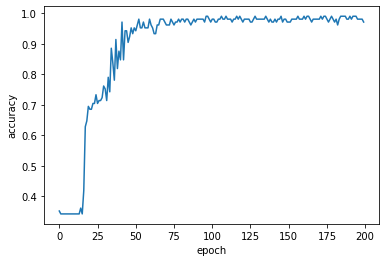

In [48]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()